<h1 style="font-size:3rem;color:0;">Jupyter Notebook Openseespy Timoshenko</h1>

In [21]:
import openseespy.opensees as ops
import math as m
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import opsvis as opsv
from streng.codes.eurocodes.ec8.cls.seismic_action.spectra import SpectraEc8


<h1 style="font-size:2rem;color:0;">Δεδομένα</h1>

In [22]:
# Διαστάσεις Φορέα 
L = 5           # Μήκος δοκού (m)
H = 3           # Μήκος υποστυλώματος (m)
cnom = 0.05     # Επικάλυψη (m)

# Διαστάσεις Δοκού
hb = 0.65       # Ύψος δοκού (m)
bw = 0.25       # Πλάτος δοκού (m)

# Διαστάσεις Υποστυλωμάτων
hc = 0.40       # Ύψος υποστυλώματος (m)
bc = 0.40       # Πλάτος υποστυλώματος (m)

# Υλικά - Σκυρόδεμα C20/25 - Χάλυβας B500C

# Σκυρόδεμα C20/25 
fck = 20                            # Χαρακτηριστική Θλιπτική αντοχή (Mpa)
fcm = fck + 8                       # Μέση θλιπτική αντοχή (Mpa)
Ecm = round(22*(fcm/10)**0.3, 1)    # Μέτρο ελαστικότητας (Gpa) 
U = 0.0                             # Συντελεστής Poisson
E = Ecm * 10**6                     # GPa -> kN/m²
G = E / (2*(1+U))                   # Μέτρο διάτμησης (kN/m²)

# Χάλυβας B500C
fy = 500                           # Χαρακτηριστική αντοχή (Mpa)
fu = 625                           # (Mpa)
fye = 575                          # (Mpa)
fue = 687.5                        # (Mpa)
Es = 2e8                           # Μέτρο ελαστικότητας (kN/m^2)

# Ράβδοι οπλισμού Δοκός
diambeam = 18    # (mm)
numbarstop = 5 
numbarsbot = 3
As_top = numbarstop * (m.pi/4) * (diambeam/1000)**2      # Εμβαδόν ράβδων άνω παρειά (m^2)
As_bot = numbarsbot * (m.pi/4) * (diambeam/1000)**2      # Εμβαδόν ράβδων κάτω παρειά (m^2)
# Συνδετήρες
diamsinde = 8     # (mm)
sp = 120          # (mm)
print(f'Ράβδοι οπλισμού Δοκού:'
      f'\nΕμβαδόν ράβδων άνω παρειάς = {As_top:.5f} m^2'
      f'\nΕμβαδόν ράβδων κάτω παρειάς = {As_bot:.5f} m^2\n')




# Ράβδοι οπλισμού Υποστυλωμάτων
diamcol = 18    # (mm)
numbarscol = 8
As_col = numbarscol * (m.pi/4) * (diamcol/1000)**2      # Εμβαδόν ράβδων υποστυλωμάτων (m^2)
print(f'Ράβδοι οπλισμού Υποστυλωμάτων:'
      f'\nΕμβαδόν ράβδων = {As_col:.5f} m^2\n')

# Φορτία 
g = 20 # Μόνιμο φορτίο (kN/m^2)
q = 10 # Κινητό φορτίο (kN/m^2)

# Μάζα
mass = (g+0.3*q)*L / 9.81

# Διατομές 
# Διατομή Δοκού
A_beam = bw * hb                           # Εμβαδόν διατομής (m^2)
Iz_beam = ((bw *(hb**3) / 12))*0.5         # Ροπή αδράνειας (m^4)
Avy_beam = (5/6*A_beam)*0.5                # Εμβαδόν διατομής για διάτμηση(m^2)

print(f'Διατομή Δοκού:')
print(f'Εμβαδόν διατομής = {A_beam:.5f} m^2')
print(f'Ροπή αδράνειας = {Iz_beam:.5f} m^4')
print(f'Εμβαδόν διατομής για διάτμηση = {Avy_beam:.5f} m^2\n')

# Διατομή Υποστυλωμάτων
A_col = bc * hc                           # Εμβαδόν διατομής (m^2)
Iz_col = ((bc * (hc**3)/12))*0.5          # Ροπή αδράνειας (m^4)
Avy_col = (5/6*A_col)*0.5                 # Εμβαδόν διατομής για διάτμηση (m^2)

print(f'Διατομή Υποστυλωμάτων:')
print(f'Εμβαδόν διατομής = {A_col:.5f} m^2')
print(f'Ροπή αδράνειας = {Iz_col:.5f} m^4')
print(f'Εμβαδόν διατομής για διάτμηση = {Avy_col:.5f} m^2\n')

# Φάσμα σχεδιασμού EC8
agR = 0.24
ductility_class = 'M'
ground_type = 'C'
importance = 'II' 
γI=1.0
q_factor = 3.0 * 1.3
ag = agR*γI
specEC8 = SpectraEc8(αgR=agR,
                     γI=γI,
                     ground_type = ground_type,
                     spectrum_type = 1,
                     η=1.0,
                     q=q_factor,
                     β=0.2)

Ράβδοι οπλισμού Δοκού:
Εμβαδόν ράβδων άνω παρειάς = 0.00127 m^2
Εμβαδόν ράβδων κάτω παρειάς = 0.00076 m^2

Ράβδοι οπλισμού Υποστυλωμάτων:
Εμβαδόν ράβδων = 0.00204 m^2

Διατομή Δοκού:
Εμβαδόν διατομής = 0.16250 m^2
Ροπή αδράνειας = 0.00286 m^4
Εμβαδόν διατομής για διάτμηση = 0.06771 m^2

Διατομή Υποστυλωμάτων:
Εμβαδόν διατομής = 0.16000 m^2
Ροπή αδράνειας = 0.00107 m^4
Εμβαδόν διατομής για διάτμηση = 0.06667 m^2



<h1 style="font-size:2rem;color:0;">Μοντελοποίηση Openseespy</h1>

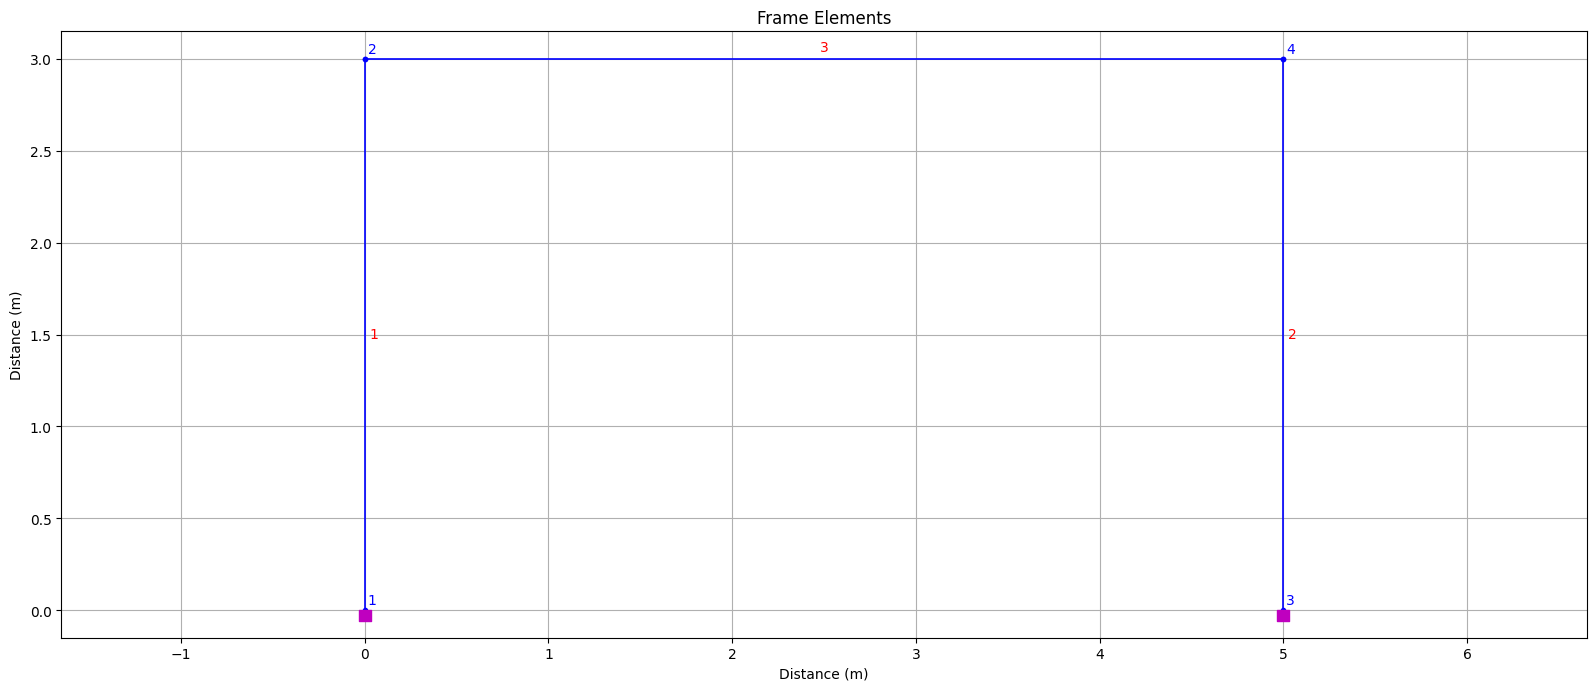

In [23]:
# Δημιουργία μοντέλου OpenSeesPy

ops.wipe()
ops.model('basic', '-ndm', 2, '-ndf', 3)

# Nodes 
ops.node(1, 0, 0)
ops.node(2, 0, H)
ops.node(3, L, 0)
ops.node(4, L, H)

# Στηρίξεις
ops.fix(1, 1, 1, 1)
ops.fix(3, 1, 1, 1)

ops.geomTransf('Linear', 1) 

ops.mass(int(2), mass, 1.0e-10, 1.0e-10)

ops.equalDOF(2, 4, 1)  

# Elements
# Υποστύλωματα
ops.element('ElasticTimoshenkoBeam', 1, 1, 2, E, G, A_col, Iz_col, Avy_col, 1)
ops.element('ElasticTimoshenkoBeam', 2, 3, 4, E, G, A_col, Iz_col, Avy_col, 1)
# Δοκός 
ops.element('ElasticTimoshenkoBeam', 3, 2, 4, E, G, A_beam, Iz_beam, Avy_beam, 1)

elem_type = {1:'Column', 2:'Column', 3:'Beam'}

def plotStructure(title):
    opsv.plot_model(fig_wi_he=(50,20))

    plt.title(title)
    plt.xlabel('Distance (m)')
    plt.ylabel('Distance (m)')
    plt.grid()
    plt.show()

plotStructure('Frame Elements')


<h1 style="font-size:2rem;color:0;">Υπολογισμός ιδιοπεριόδων και σεισμικών δράσεων
</h1>

In [27]:
# Eigenvalue analysis
numEigen = 1
eigenValues = ops.eigen('-genBandArpack', numEigen)

_periods = []
for i in range(0, numEigen):
    lamb = eigenValues[i]
    period = 2 * np.pi / np.sqrt(lamb)
    _periods.append(period)
    print(f'Period {i+1} = {period:.4f}s')

# Υπολογισμός σεισμικών δράσεων 
period = _periods[0]
Sd_T = specEC8.Sd(period) * 9.81
M = mass 
if period <= 2*specEC8.TC:
    λ_ec8 = 0.85  # Για κτίρια με >2 ορόφους
else:
    λ_ec8 = 1.0   # Για μονοόροφα/μικρά

Vb = M * Sd_T * λ_ec8


print(f'Επιτάχυνση σχεδιασμού Sd(T) = {Sd_T:.3f}m/sec2')
print(f'Μάζα για το σύνολο του Φορέα M = {M:.2f}t')
print(f'Τέμνουσα βάσης Vb = {Vb:.2f}kN')

Period 1 = 0.1475s
Επιτάχυνση σχεδιασμού Sd(T) = 1.754m/sec2
Μάζα για το σύνολο του Φορέα M = 11.72t
Τέμνουσα βάσης Vb = 17.48kN


<h1 style="font-size:2rem;color:0;">Συνδυασμός 1: G + 0.3Q + Ex</h1>

WARNING can't set handler after analysis is created


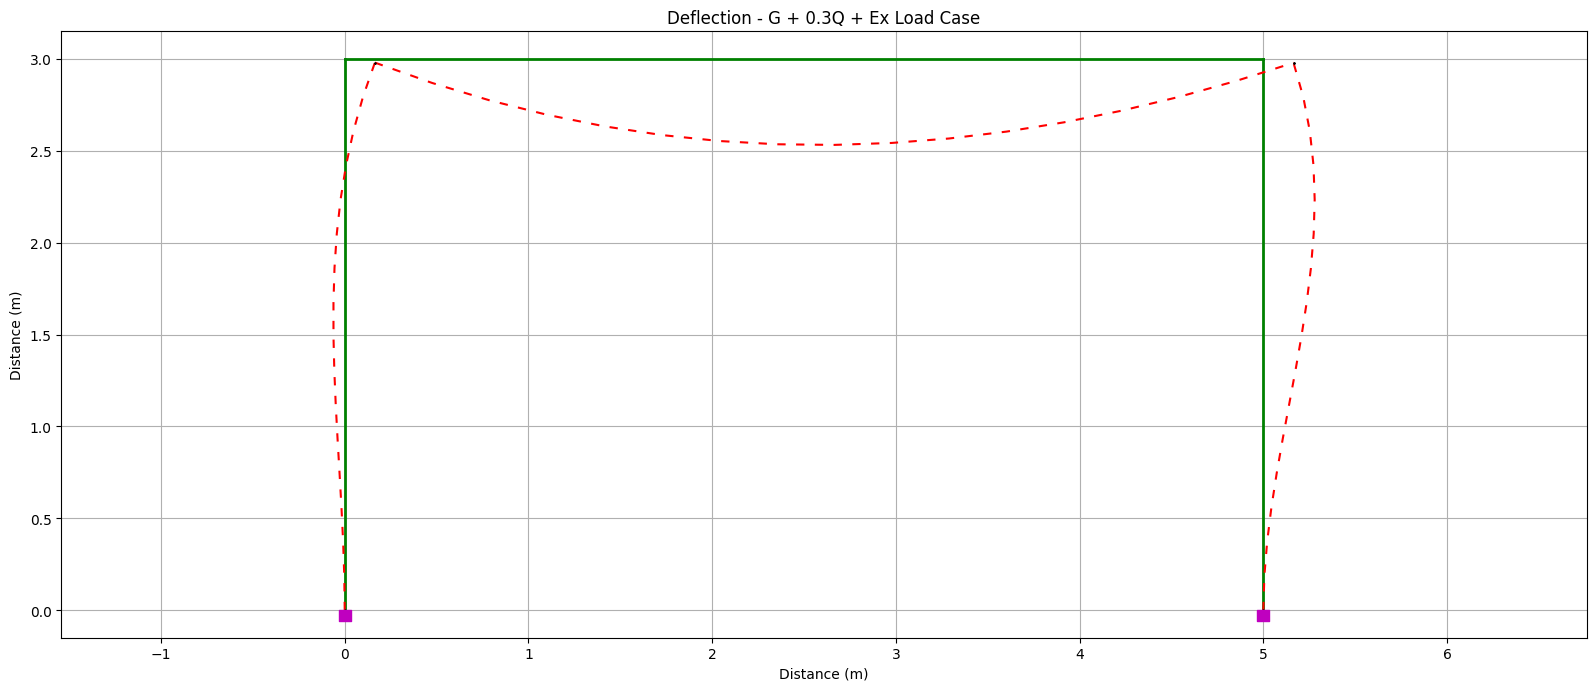

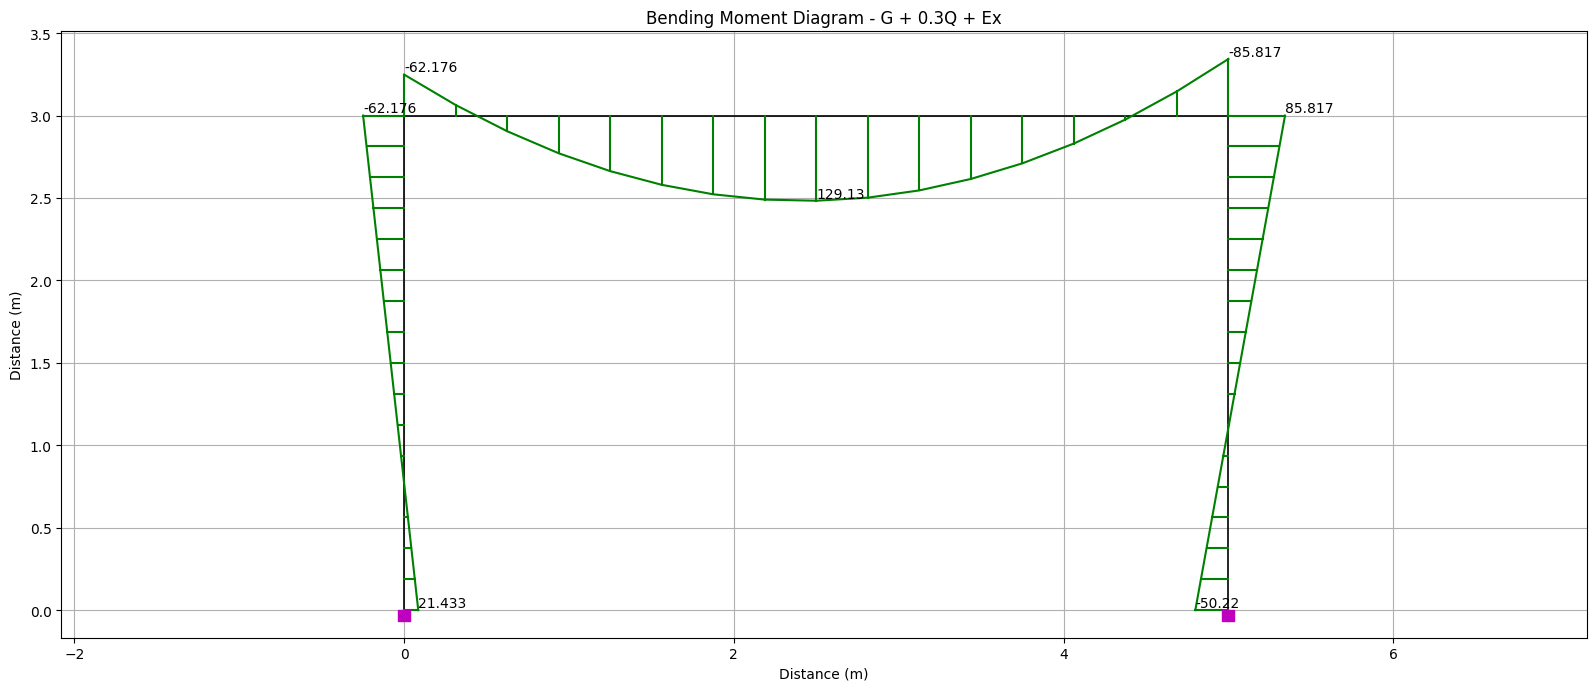

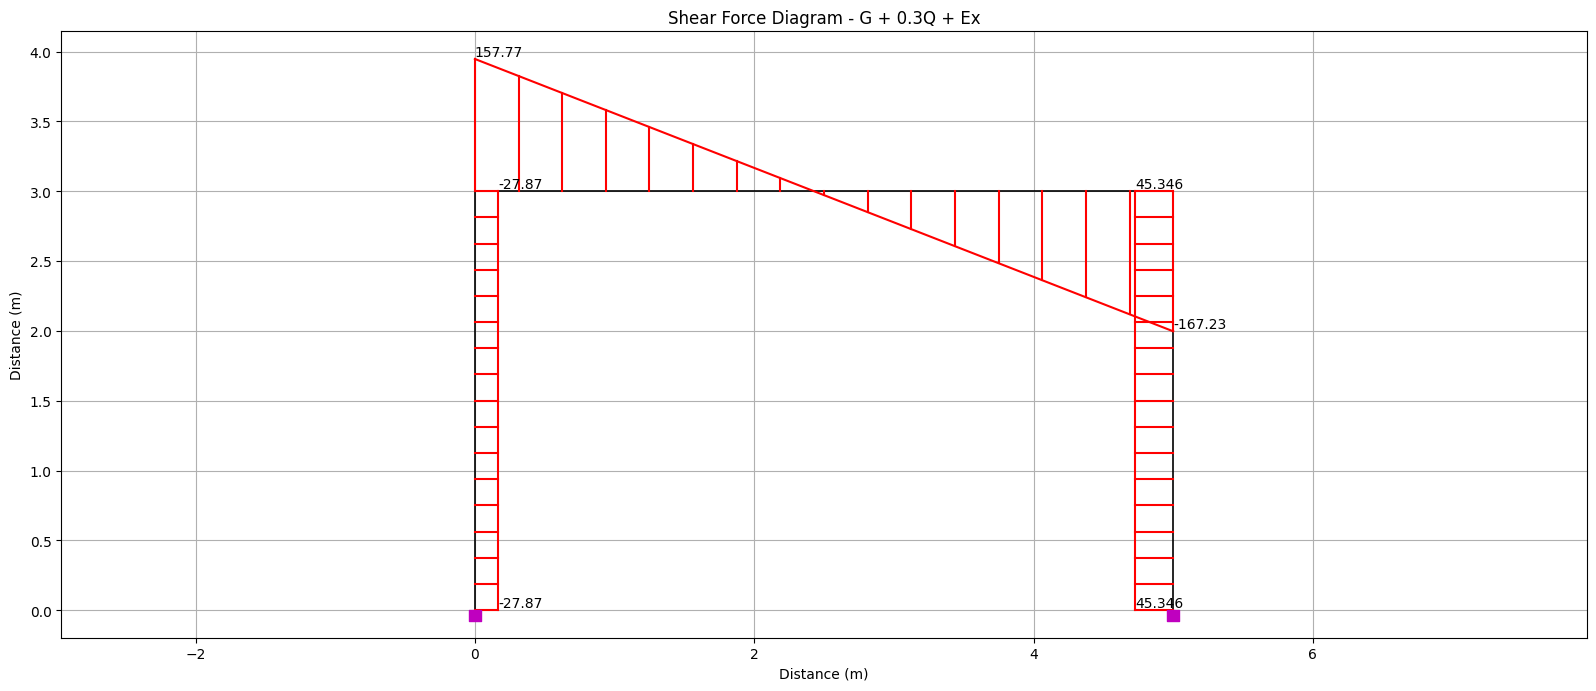

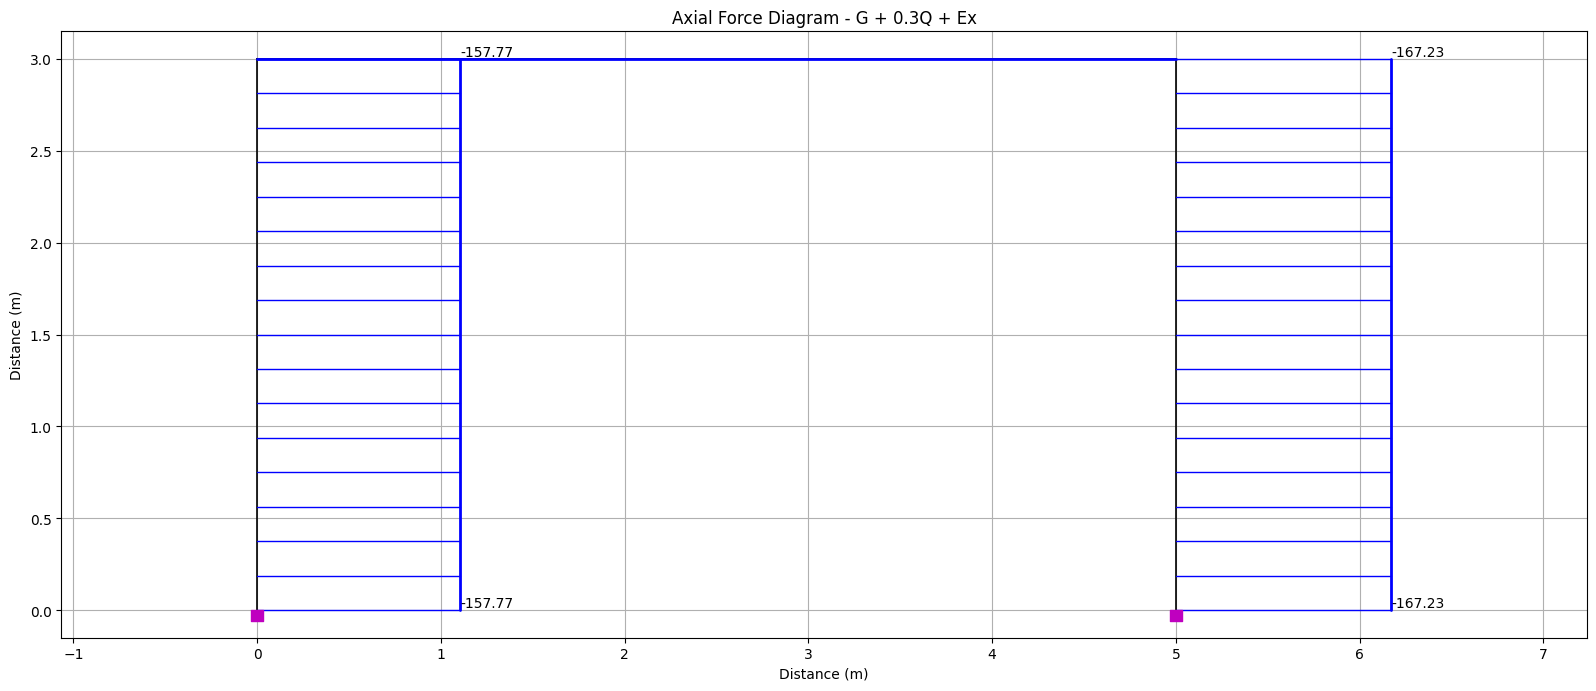

In [28]:
# Φορτία - Συνδυασμός 1: (G + 0.3Q + Ex)
ops.timeSeries('Constant', 1)
ops.pattern('Plain', 1, 1)

# Συγκεντρωμένο οριζόντιο φορτίο Vb στον κόμβο 2
ops.load(2, Vb, 0.0, 0.0)

# Ομοιόμορφο φορτίο μόνο στη δοκό (στοιχείο 3)
ops.eleLoad('-ele', 3, '-type', '-beamUniform', -(g + 0.3*q))

# Ανάλυση
ops.system('BandGeneral')
ops.numberer('RCM')
ops.constraints('Transformation')
ops.test('NormDispIncr', 1.0e-8, 6, 2)
ops.integrator('LoadControl', 1.0)
ops.algorithm('Linear')
ops.analysis('Static')

# Διαγράμματα 

# 1 step analysis
ops.analyze(1)
sfac = 200
opsv.plot_defo(sfac,
                   fig_wi_he=(50,20),
                   fmt_defo={'color': 'red', 'linestyle': (0, (4, 5)), 'linewidth': 1.5},
                   fmt_undefo={'color': 'green', 'linestyle': 'solid', 'linewidth': 2,},
                  )
plt.title('Deflection - G + 0.3Q + Ex Load Case')
plt.xlabel('Distance (m)')
plt.ylabel('Distance (m)')
plt.grid()
plt.show()

# Διαγράμματα Μ, V, N
sfacN, sfacV, sfacM = 7.e-3, 6.e-3, 4.e-3

opsv.section_force_diagram_2d('M', sfacM, fig_wi_he=(50,20),
                             fmt_secforce1={'color': 'green'},
                             fmt_secforce2={'color': 'green'})

plt.title('Bending Moment Diagram - G + 0.3Q + Ex')
plt.xlabel('Distance (m)')
plt.ylabel('Distance (m)')
plt.grid()
plt.show()

opsv.section_force_diagram_2d('V', sfacV, fig_wi_he=(50,20),
                             fmt_secforce1={'color': 'red'},
                             fmt_secforce2={'color': 'red'})

plt.title('Shear Force Diagram - G + 0.3Q + Ex')
plt.xlabel('Distance (m)')
plt.ylabel('Distance (m)')
plt.grid()
plt.show()

opsv.section_force_diagram_2d('N', sfacN, fig_wi_he=(50,20))

plt.title('Axial Force Diagram - G + 0.3Q + Ex')
plt.xlabel('Distance (m)')
plt.ylabel('Distance (m)')
plt.grid()
plt.show()

<h1 style="font-size:2rem;color:0;">Συνδυασμός 2: 1.35G + 1.5Q</h1>

In [29]:
# Αφαίρεση προηγούμενου load pattern
ops.wipeAnalysis()
ops.remove('loadPattern', 1)
ops.remove('timeSeries', 1)

# Μηδενισμός του domain (μετακινήσεις = 0)
ops.setTime(0.0)

# Φορτία - Συνδυασμός 2: (1.35G + 1.5Q)
ops.timeSeries('Constant', 2)
ops.pattern('Plain', 2, 2)

ops.eleLoad('-ele', 3, '-type', '-beamUniform', -(1.35*g + 1.5*q))

# Ανάλυση 1.35G + 1.5Q
ops.system('BandGeneral')
ops.numberer('RCM')
ops.constraints('Transformation')
ops.test('NormDispIncr', 1.0e-8, 6, 2)
ops.integrator('LoadControl', 1.0)
ops.algorithm('Linear')
ops.analysis('Static')

# Διαγράμματα 
ops.analyze(1)
sfac = 100
sfacN, sfacV, sfacM = 7.e-3, 6.e-3, 4.e-3

opsv.plot_defo(sfac,
                   fig_wi_he=(50,20),
                   fmt_defo={'color': 'red', 'linestyle': (0, (4, 5)), 'linewidth': 1.5},
                   fmt_undefo={'color': 'green', 'linestyle': 'solid', 'linewidth': 2,},
                  )
plt.title('Deflection - 1.35G + 1.5Q Load Case')
plt.xlabel('Distance (m)')
plt.ylabel('Distance (m)')
plt.grid()
plt.show()


opsv.section_force_diagram_2d('M', sfacM, fig_wi_he=(50,20),
                             fmt_secforce1={'color': 'green'},
                             fmt_secforce2={'color': 'green'})

plt.title('Bending Moment Diagram - 1.35G + 1.5Q')
plt.xlabel('Distance (m)')
plt.ylabel('Distance (m)')
plt.grid()
plt.show()

opsv.section_force_diagram_2d('V', sfacV, fig_wi_he=(50,20),
                             fmt_secforce1={'color': 'red'},
                             fmt_secforce2={'color': 'red'})

plt.title('Shear Force Diagram - 1.35G + 1.5Q')
plt.xlabel('Distance (m)')
plt.ylabel('Distance (m)')
plt.grid()
plt.show()

opsv.section_force_diagram_2d('N', sfacN, fig_wi_he=(50,20))

plt.title('Axial Force Diagram - 1.35G + 1.5Q')
plt.xlabel('Distance (m)')
plt.ylabel('Distance (m)')
plt.grid()
plt.show()

MapOfTaggedObjects::addComponent - not adding as one with similar tag exists, tag: 2
ERROR could not add timeseries to domain.


OpenSeesError: See stderr output